# Quandl And Bonds

This notebook demonstrates downloading bond information from Quandl

<span style="color:red">Note: We have no license for this data.  Our previews are limited. If you run out of previews or cannot find a bond, use Bloomberg to get the data instead.</span>

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import Quandl
import functools
import seaborn as sns
import datetime


Our usual memoization

In [3]:
@functools.lru_cache(maxsize=1600)
def fetch_quandl(my_data_items, trim_start=None):
    qdata = Quandl.get(list(my_data_items), 
                      trim_start=trim_start)
    return qdata

Let's fetch some bond prices

In [5]:
my_cusip = '852061AS9'
from_date = datetime.date.today()-datetime.timedelta(days=9)
from_date_str = from_date.strftime("%Y-%m-%d")
from_date_str

'2015-04-26'

In [7]:
raw_data = fetch_quandl(('CORP/{cusip}'.format(cusip=my_cusip),),
                        trim_start=from_date_str)


In [8]:
pd.concat((raw_data.head(),raw_data.tail()))

,CORP.852061AS9 - MAVEN_SIZE,CORP.852061AS9 - MAVEN_SPREAD,CORP.852061AS9 - MAVEN_YIELD,CORP.852061AS9 - MAVEN_PRICE,CORP.852061AS9 - MAVEN_DV01,CORP.852061AS9 - MAVEN_NET_CHANGE,CORP.852061AS9 - HISTORICAL_ACCURACY,CORP.852061AS9 - MAVEN_CONVEXITY,CORP.852061AS9 - DLR_CUST_TRADES,CORP.852061AS9 - DLR_CUST_VOLUME,CORP.852061AS9 - DLR_DLR_TRADES,CORP.852061AS9 - DLR_DLR_VOLUME,CORP.852061AS9 - LAST_TRADE_SIZE,CORP.852061AS9 - LAST_TRADE_SPREAD,CORP.852061AS9 - LAST_TRADE_YIELD,CORP.852061AS9 - LAST_TRADE_PRICE,CORP.852061AS9 - LAST_TRADE_DATE,CORP.852061AS9 - REFERENCE_TREASURY_YTM
Date,,,,,,,,,,,,,,,,,,
2015-04-27,0.03,488.4,6.818,95.24,5.651,NaN,98.367,5.767,41.659,24,5.02,7,NaN,0.03,471.1,6.639,20150427,1.933
2015-04-28,0.10,491.6,6.927,94.62,5.605,NaN,99.707,5.755,41.527,22,3.00,12,NaN,0.10,487.9,6.887,20150428,2.011
2015-04-29,1.00,482.2,6.880,94.89,5.619,NaN,99.102,5.751,41.473,30,6.21,10,NaN,1.00,490.5,6.950,20150429,2.058
2015-04-30,0.02,467.7,6.720,95.80,5.683,NaN,98.927,5.762,41.586,25,3.20,8,NaN,0.02,456.6,6.613,20150430,2.044
2015-05-01,1.00,491.5,7.035,94.03,5.554,NaN,98.450,5.733,41.268,12,4.17,10,NaN,1.00,496.3,7.085,20150501,2.121
2015-04-29,1.00,482.2,6.880,94.89,5.619,NaN,99.102,5.751,41.473,30,6.21,10,NaN,1.00,490.5,6.950,20150429,2.058
2015-04-30,0.02,467.7,6.720,95.80,5.683,NaN,98.927,5.762,41.586,25,3.20,8,NaN,0.02,456.6,6.613,20150430,2.044
2015-05-01,1.00,491.5,7.035,94.03,5.554,NaN,98.450,5.733,41.268,12,4.17,10,NaN,1.00,496.3,7.085,20150501,2.121
2015-05-04,0.45,475.4,6.909,94.73,5.603,NaN,99.642,5.741,41.350,24,5.47,5,NaN,0.45,486.3,7.018,20150504,2.155


In [12]:
def clean_quandl_columns(dataframe):
    replacement_columns = {}
    for c in dataframe.columns:
        series_name, variable = c.split(' - ')
        source_name, asset = series_name.split('.')
        replacement_columns[c] = asset+":"+variable
    renamed_data = dataframe.rename(columns=replacement_columns)
    return renamed_data

In [13]:
bond_data = clean_quandl_columns(raw_data)

In [14]:
print(bond_data.columns)
ends = pd.concat((bond_data.head(),bond_data.tail()))
ends[ends.columns[::-1]]

Index(['852061AS9:MAVEN_SIZE', '852061AS9:MAVEN_SPREAD', '852061AS9:MAVEN_YIELD', '852061AS9:MAVEN_PRICE', '852061AS9:MAVEN_DV01', '852061AS9:MAVEN_NET_CHANGE', '852061AS9:HISTORICAL_ACCURACY', '852061AS9:MAVEN_CONVEXITY', '852061AS9:DLR_CUST_TRADES', '852061AS9:DLR_CUST_VOLUME', '852061AS9:DLR_DLR_TRADES', '852061AS9:DLR_DLR_VOLUME', '852061AS9:LAST_TRADE_SIZE', '852061AS9:LAST_TRADE_SPREAD', '852061AS9:LAST_TRADE_YIELD', '852061AS9:LAST_TRADE_PRICE', '852061AS9:LAST_TRADE_DATE', '852061AS9:REFERENCE_TREASURY_YTM'], dtype='object')


,852061AS9:REFERENCE_TREASURY_YTM,852061AS9:LAST_TRADE_DATE,852061AS9:LAST_TRADE_PRICE,852061AS9:LAST_TRADE_YIELD,852061AS9:LAST_TRADE_SPREAD,852061AS9:LAST_TRADE_SIZE,852061AS9:DLR_DLR_VOLUME,852061AS9:DLR_DLR_TRADES,852061AS9:DLR_CUST_VOLUME,852061AS9:DLR_CUST_TRADES,852061AS9:MAVEN_CONVEXITY,852061AS9:HISTORICAL_ACCURACY,852061AS9:MAVEN_NET_CHANGE,852061AS9:MAVEN_DV01,852061AS9:MAVEN_PRICE,852061AS9:MAVEN_YIELD,852061AS9:MAVEN_SPREAD,852061AS9:MAVEN_SIZE
Date,,,,,,,,,,,,,,,,,,
2015-04-27,1.933,20150427,6.639,471.1,0.03,NaN,7,5.02,24,41.659,5.767,98.367,NaN,5.651,95.24,6.818,488.4,0.03
2015-04-28,2.011,20150428,6.887,487.9,0.10,NaN,12,3.00,22,41.527,5.755,99.707,NaN,5.605,94.62,6.927,491.6,0.10
2015-04-29,2.058,20150429,6.950,490.5,1.00,NaN,10,6.21,30,41.473,5.751,99.102,NaN,5.619,94.89,6.880,482.2,1.00
2015-04-30,2.044,20150430,6.613,456.6,0.02,NaN,8,3.20,25,41.586,5.762,98.927,NaN,5.683,95.80,6.720,467.7,0.02
2015-05-01,2.121,20150501,7.085,496.3,1.00,NaN,10,4.17,12,41.268,5.733,98.450,NaN,5.554,94.03,7.035,491.5,1.00
2015-04-29,2.058,20150429,6.950,490.5,1.00,NaN,10,6.21,30,41.473,5.751,99.102,NaN,5.619,94.89,6.880,482.2,1.00
2015-04-30,2.044,20150430,6.613,456.6,0.02,NaN,8,3.20,25,41.586,5.762,98.927,NaN,5.683,95.80,6.720,467.7,0.02
2015-05-01,2.121,20150501,7.085,496.3,1.00,NaN,10,4.17,12,41.268,5.733,98.450,NaN,5.554,94.03,7.035,491.5,1.00
2015-05-04,2.155,20150504,7.018,486.3,0.45,NaN,5,5.47,24,41.350,5.741,99.642,NaN,5.603,94.73,6.909,475.4,0.45


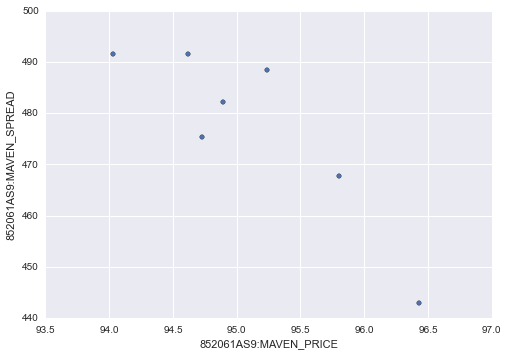

In [17]:
bond_data.plot(x='852061AS9:MAVEN_PRICE', y='852061AS9:MAVEN_SPREAD', kind='scatter')